<h5> Problem 01: “Advanced Plot Customization and Axes Control” </h5>

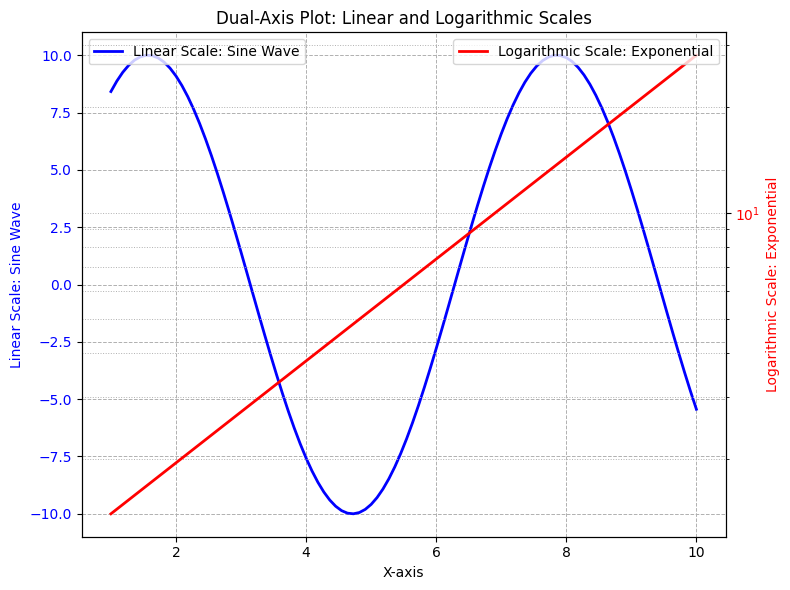

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
x = np.linspace(1, 10, 100)
y1 = np.exp(x / 3)  # Data for the logarithmic scale plot
y2 = np.sin(x) * 10  # Data for the linear scale plot

# Create a figure and a primary axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot y2 on the primary y-axis (linear scale)
ax1.plot(x, y2, 'b-', label='Linear Scale: Sine Wave', linewidth=2)
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Linear Scale: Sine Wave', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, which='both', linestyle='--', linewidth=0.7)

# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot y1 on the secondary y-axis (logarithmic scale)
ax2.plot(x, y1, 'r-', label='Logarithmic Scale: Exponential', linewidth=2)
ax2.set_ylabel('Logarithmic Scale: Exponential', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_yscale('log')
ax2.grid(True, which='both', linestyle=':', linewidth=0.7)

# Add a legend for each axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout for clarity
plt.title('Dual-Axis Plot: Linear and Logarithmic Scales')
fig.tight_layout()

# Show the plot
plt.show()


<h5> Problem 02: “Interactive Plotting with Widgets” </h5>

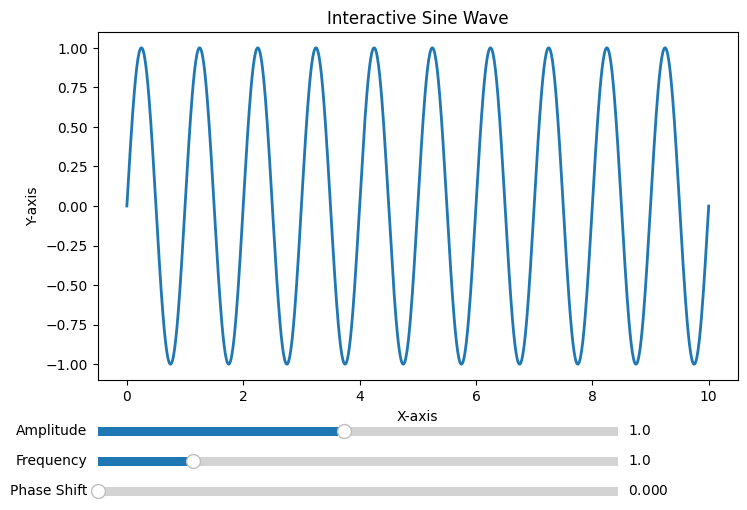

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Initial parameters for the sine wave
amplitude = 1.0
frequency = 1.0
phase_shift = 0.0

# Create the figure and axis for plotting
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.3)

# Generate x values and initial y values
x = np.linspace(0, 10, 1000)
y = amplitude * np.sin(2 * np.pi * frequency * x + phase_shift)
line, = ax.plot(x, y, lw=2)

# Set the axis labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Interactive Sine Wave')

# Create sliders for amplitude, frequency, and phase shift
ax_amp = plt.axes([0.1, 0.2, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_freq = plt.axes([0.1, 0.15, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_phase = plt.axes([0.1, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')

slider_amp = Slider(ax_amp, 'Amplitude', 0.1, 2.0, valinit=amplitude)
slider_freq = Slider(ax_freq, 'Frequency', 0.1, 5.0, valinit=frequency)
slider_phase = Slider(ax_phase, 'Phase Shift', 0, 2 * np.pi, valinit=phase_shift)

# Define the update function to be called whenever a slider's value changes
def update(val):
    amp = slider_amp.val
    freq = slider_freq.val
    phase = slider_phase.val
    line.set_ydata(amp * np.sin(2 * np.pi * freq * x + phase))
    fig.canvas.draw_idle()  # Redraw the plot

# Connect the update function to slider events
slider_amp.on_changed(update)
slider_freq.on_changed(update)
slider_phase.on_changed(update)

# Show the plot
plt.show()


<h5> Problem 03: “3D Visualization with Custom Projections” </h5>

<ipython-input-3-292928339035>:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(m, shrink=0.5, aspect=10, label='Intensity (z)')


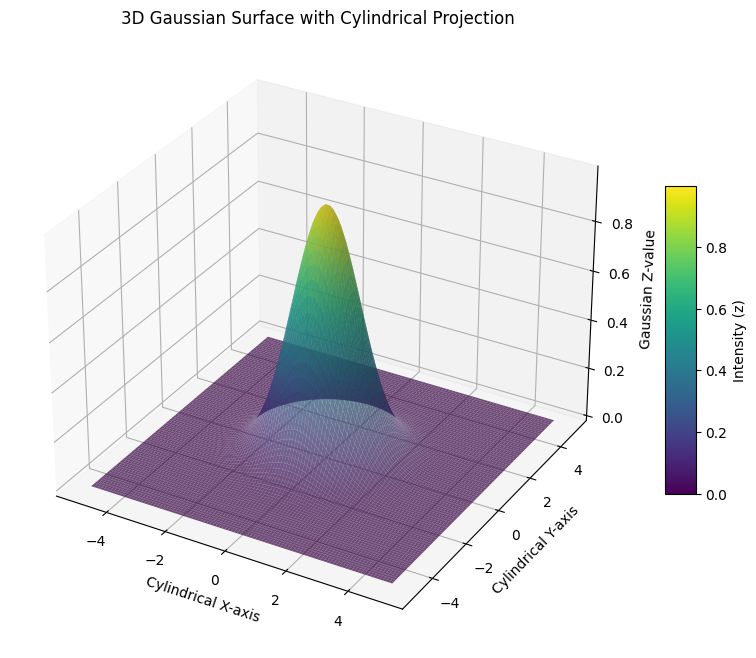

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the Gaussian function
A = 1.0  # Amplitude
sigma = 1.0  # Spread parameter

# Generate x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# Define the Gaussian function
z = A * np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Apply a cylindrical-like transformation (non-standard projection)
r = np.sqrt(x**2 + y**2)  # Radius for cylindrical coordinates
theta = np.arctan2(y, x)  # Angle for cylindrical coordinates
x_cylindrical = r * np.cos(theta)  # Convert back to Cartesian x
y_cylindrical = r * np.sin(theta)  # Convert back to Cartesian y

# Create a figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with a color map
surface = ax.plot_surface(
    x_cylindrical, y_cylindrical, z,
    rstride=1, cstride=1, facecolors=plt.cm.viridis(z),
    linewidth=0, antialiased=True, alpha=0.7
)

# Customize the axis labels
ax.set_xlabel('Cylindrical X-axis')
ax.set_ylabel('Cylindrical Y-axis')
ax.set_zlabel('Gaussian Z-value')

# Add a color bar to show the mapping of colors to z-values
m = plt.cm.ScalarMappable(cmap='viridis')
m.set_array(z)
plt.colorbar(m, shrink=0.5, aspect=10, label='Intensity (z)')

# Add a title to the plot
ax.set_title('3D Gaussian Surface with Cylindrical Projection')

# Show the plot
plt.show()


<h5> Problem 04: “Plot Efficiency and Performance Optimization” </h5>

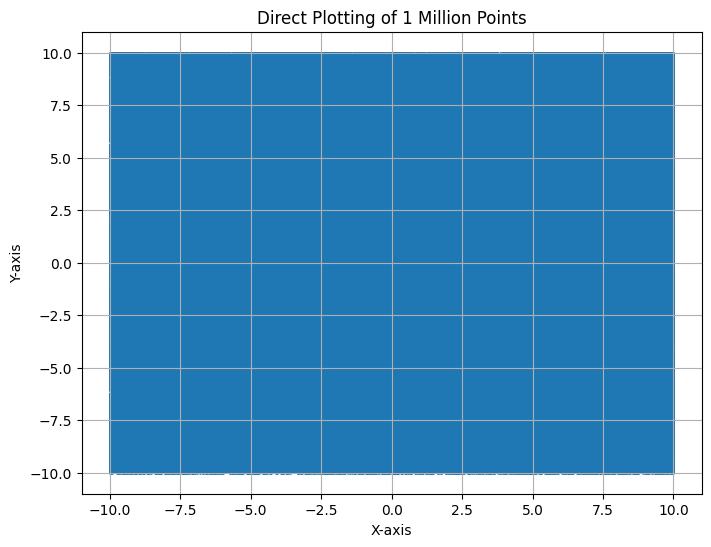

Direct Plotting of 1 Million Points took 0.97 seconds.


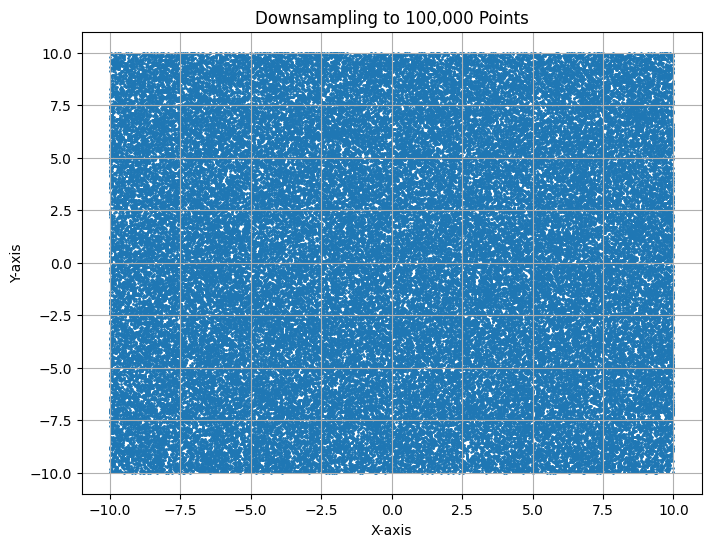

Downsampling to 100,000 Points took 0.45 seconds.


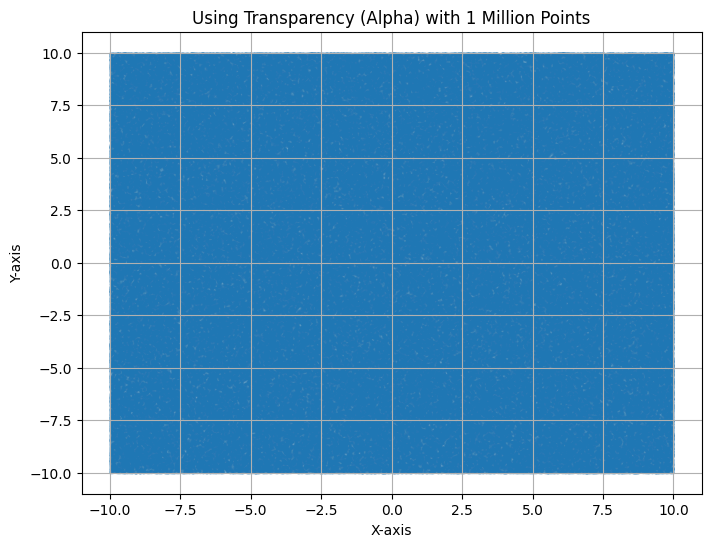

Using Transparency (Alpha) with 1 Million Points took 1.08 seconds.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Generate a large dataset with 1 million points
n_points = 1_000_000
x = np.random.uniform(-10, 10, n_points)
y = np.random.uniform(-10, 10, n_points)

# Function to measure and plot
def plot_with_time(title, plot_func):
    start_time = time.time()
    plt.figure(figsize=(8, 6))
    plot_func()
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()
    end_time = time.time()
    print(f"{title} took {end_time - start_time:.2f} seconds.")

# Method 1: Direct Plotting (not recommended for 1 million points)
plot_with_time("Direct Plotting of 1 Million Points", lambda: plt.scatter(x, y, s=1))

# Method 2: Downsampling (Plotting a subset of the data)
subset_size = 100_000  # Downsample to 100,000 points
x_downsampled = x[:subset_size]
y_downsampled = y[:subset_size]
plot_with_time("Downsampling to 100,000 Points", lambda: plt.scatter(x_downsampled, y_downsampled, s=1))

# Method 3: Using Transparency (Alpha)
plot_with_time("Using Transparency (Alpha) with 1 Million Points", lambda: plt.scatter(x, y, s=1, alpha=0.1))

# Method 4: Using Fast Libraries like Datashader (Example code)
# Note: Datashader needs to be installed separately and is an external library.
# import datashader as ds
# import pandas as pd
# from datashader import Canvas
# from datashader.transfer_functions import shade
# data = pd.DataFrame({'x': x, 'y': y})
# canvas = Canvas(plot_width=800, plot_height=600)
# agg = canvas.points(data, 'x', 'y')
# img = shade(agg)
# img.to_pil().show()

# The Datashader approach would take less time and is ideal for extremely large datasets.

# Method 5: Blitting (for dynamic plots - omitted here as it's more for animations)


<h5> Problem 05: “Custom Colormaps and Data Normalization” </h5>

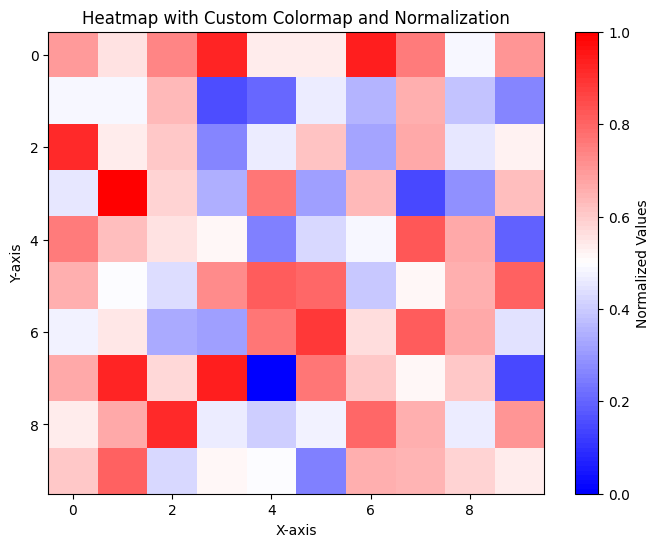

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Generate sample data (e.g., a 10x10 matrix of random values)
np.random.seed(42)
data = np.random.randn(10, 10) * 10  # Data with both high and low values

# Normalize the data using Min-Max normalization to range [0, 1]
norm = Normalize(vmin=np.min(data), vmax=np.max(data))
data_normalized = norm(data)

# Create a custom colormap that emphasizes low (blue), mid (white), and high (red) values
colors = ["blue", "white", "red"]
n_bins = 100  # Number of color segments
cmap_name = "custom_extremes"
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap with the custom colormap and normalized data
plt.figure(figsize=(8, 6))
plt.imshow(data_normalized, cmap=custom_cmap, aspect='auto')
plt.colorbar(label='Normalized Values')
plt.title('Heatmap with Custom Colormap and Normalization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(False)
plt.show()


<h5> Problem 06: “Subplots with Shared Axes and Complex Layouts” </h5>

<ipython-input-6-076ad0e2bae4>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


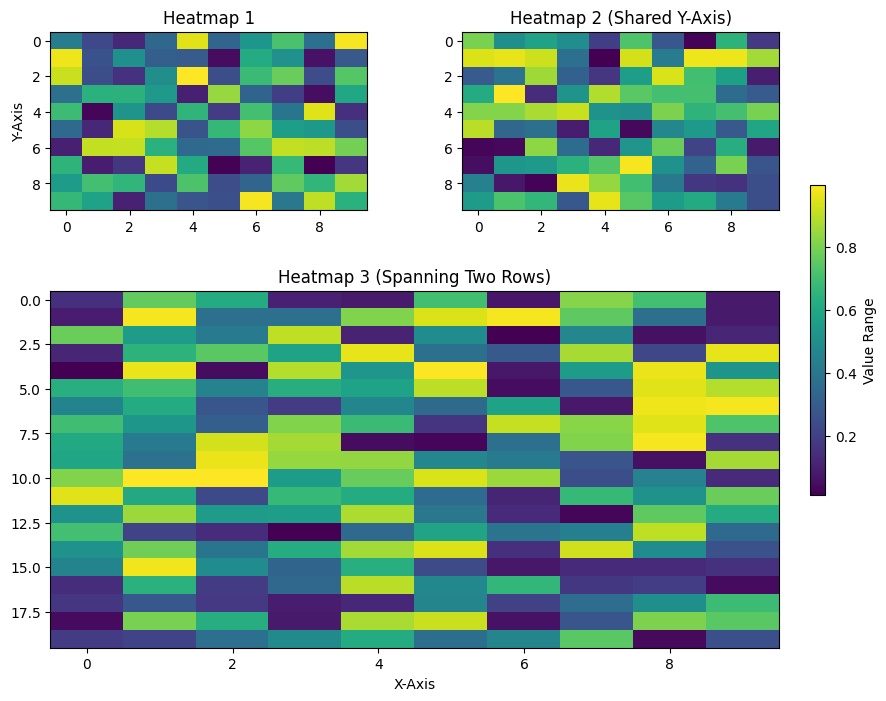

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Generate some data for the heatmaps
data1 = np.random.rand(10, 10)
data2 = np.random.rand(10, 10)
data3 = np.random.rand(10, 10)
data4 = np.random.rand(20, 10)  # Different dimensions to span two rows

# Create a figure and a GridSpec object
fig = plt.figure(figsize=(10, 8))
gs = GridSpec(2, 2, figure=fig, height_ratios=[1, 2], width_ratios=[1, 1], wspace=0.3, hspace=0.3)

# Create subplots using GridSpec
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)  # Share the y-axis with ax1
ax3 = fig.add_subplot(gs[1, :])  # This spans both columns (two rows)

# Plot the data using heatmaps for demonstration
cmap = 'viridis'
im1 = ax1.imshow(data1, cmap=cmap, aspect='auto')
im2 = ax2.imshow(data2, cmap=cmap, aspect='auto')
im3 = ax3.imshow(data4, cmap=cmap, aspect='auto')

# Add a shared color bar for all heatmaps
cbar = fig.colorbar(im3, ax=[ax1, ax2, ax3], orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Value Range')

# Add titles and labels
ax1.set_title('Heatmap 1')
ax2.set_title('Heatmap 2 (Shared Y-Axis)')
ax3.set_title('Heatmap 3 (Spanning Two Rows)')
ax1.set_ylabel('Y-Axis')
ax3.set_xlabel('X-Axis')

# Display the plot
plt.tight_layout()
plt.show()


<h5> Problem 07: “Interactive Data Visualization with Matplotlib and Widgets”</h5>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Function to update the sine wave plot
def update_plot(amplitude, frequency):
    # Clear the current figure
    plt.clf()

    # Generate x values
    x = np.linspace(0, 2 * np.pi, 100)

    # Calculate y values based on amplitude and frequency
    y = amplitude * np.sin(frequency * x)

    # Create the plot
    plt.plot(x, y, label=f'Sine Wave: Amplitude={amplitude}, Frequency={frequency}')
    plt.title('Interactive Sine Wave')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.legend()
    plt.ylim(-10, 10)
    plt.show()

# Create sliders for amplitude and frequency
amplitude_slider = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='Amplitude:')
frequency_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='Frequency:')

# Create interactive plot
interactive_plot = widgets.interactive(update_plot, amplitude=amplitude_slider, frequency=frequency_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Amplitude:', max=10.0), FloatSlider(value=1.0, descr…

<h5>Problem 08: “Advanced Visualization Techniques with Subplots and Annotations”</h5>

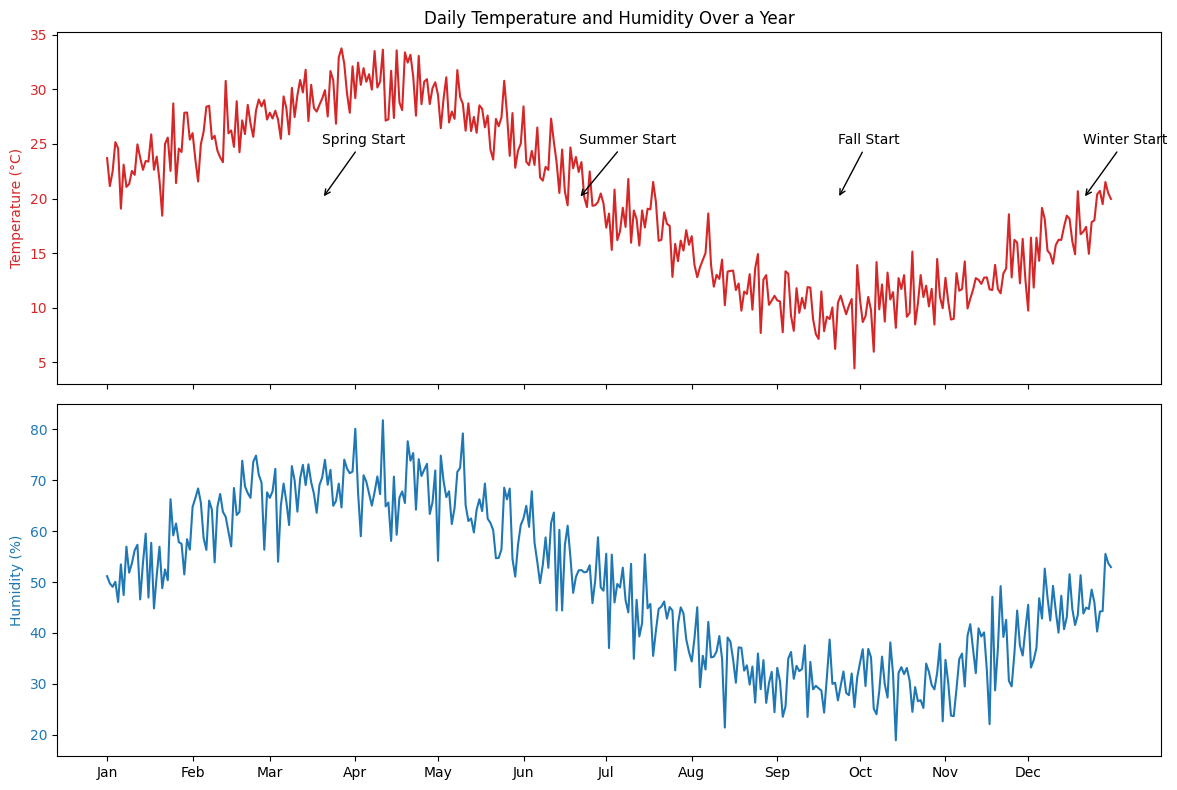

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate sample data for temperature and humidity
# Assuming we have daily data for one year (365 days)
np.random.seed(0)
days = pd.date_range('2023-01-01', periods=365)
temperature = 20 + 10 * np.sin(2 * np.pi * days.dayofyear / 365) + np.random.normal(0, 2, size=days.size)
humidity = 50 + 20 * np.sin(2 * np.pi * days.dayofyear / 365) + np.random.normal(0, 5, size=days.size)

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))

# Plot temperature data
ax1.plot(days, temperature, color='tab:red', label='Temperature (°C)')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_title('Daily Temperature and Humidity Over a Year')

# Plot humidity data
ax2.plot(days, humidity, color='tab:blue', label='Humidity (%)')
ax2.set_ylabel('Humidity (%)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Annotating key events (e.g., seasonal changes)
key_events = {
    'Spring Start': '2023-03-20',
    'Summer Start': '2023-06-21',
    'Fall Start': '2023-09-23',
    'Winter Start': '2023-12-21'
}

for event, date in key_events.items():
    ax1.annotate(event,
                 xy=(pd.to_datetime(date), 20),
                 xytext=(pd.to_datetime(date), 25),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10, color='black')

# Formatting the x-axis
ax2.set_xticks(pd.date_range('2023-01-01', '2023-12-31', freq='1MS'))
ax2.set_xticklabels(pd.date_range('2023-01-01', '2023-12-31', freq='1MS').strftime('%b'))

# Display the plots with a shared x-axis
plt.tight_layout()
plt.show()
